# Sliding Window Pattern

## Maximum Sum of Contiguous Array
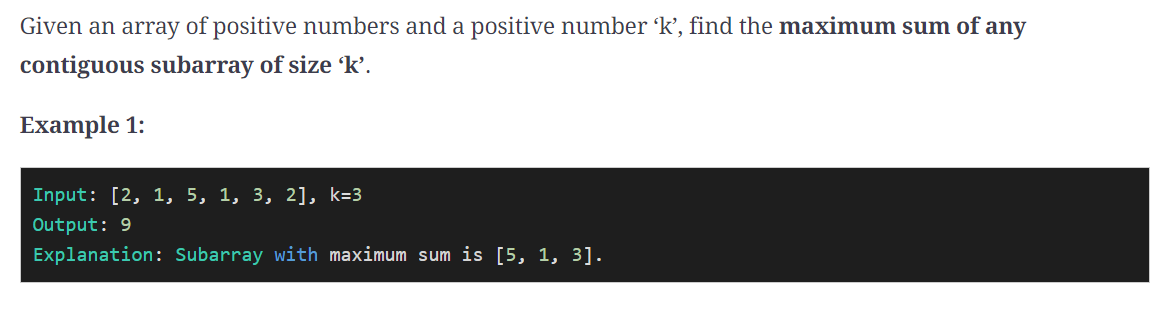

In [19]:
def f(A, k) -> int:
    # A : int[] | A_i > 0
    # k : int | k > 0
    # x: int | x = sum(subA), maximize(x)
    # subA: int[] | len(subA) = k
    subA_end = 0
    max_x = 0
    current_x = 0
    
    for i in range(len(A)):
        current_x += A[i]
        # invariant: current_x is sum of at most k elements consecutively before i 
        if i > k - 1:     
            current_x -= A[i-k]
        if current_x > max_x:
            max_x = current_x
    return max_x

assert f([2, 1, 5, 1, 3 , 2] , 3) == 9

## Smallest Subarray with a given sum
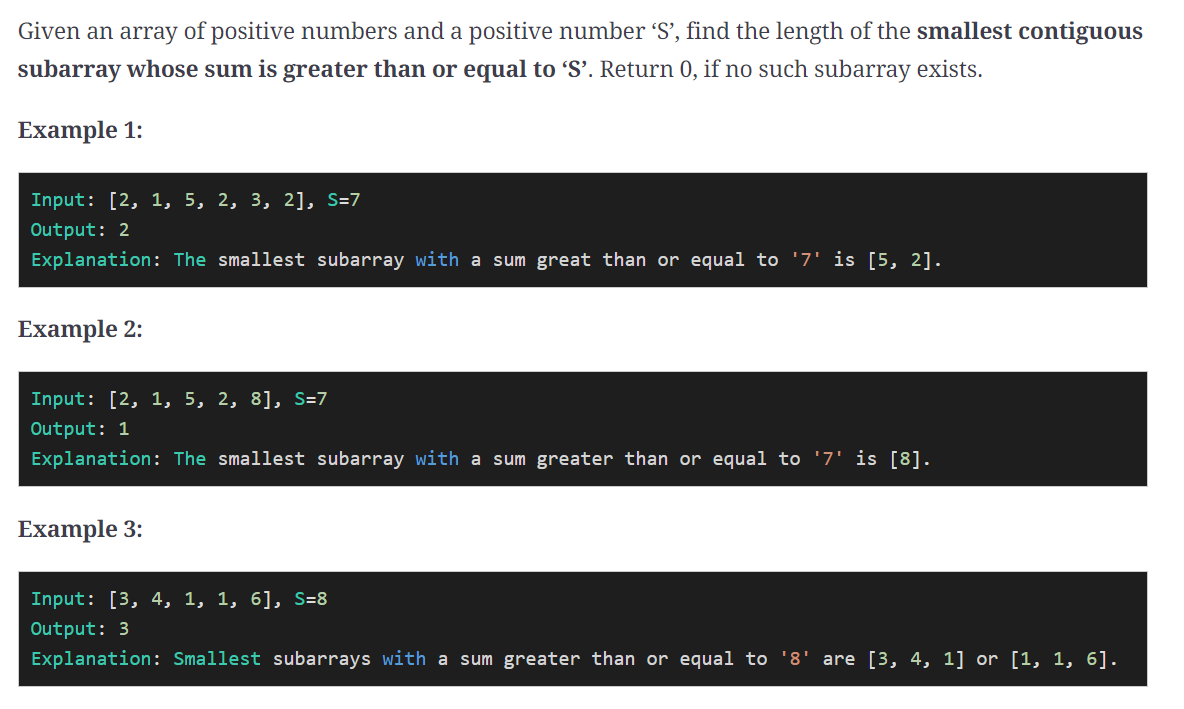

In [41]:
import math
def f(A, S):
    # A: int[] | A_i > 0
    # S: int |  S > 0
    # x: int | x = len(subA), minimize(x)
    # subA: int[] | sum(subA) >= S
    current_x = 0
    min_x = math.inf
    sum_subA = 0
    
    for i in range(len(A)):
        # pre-invariant: accumulate sum_subA until >= S
        sum_subA += A[i]
        current_x += 1
        if sum_subA < S:
            continue
        else:
            # Prune until sum(subA) >= S constraint is no longer satisfied
            while sum_subA >= S:
                sum_subA -= A[i-current_x+1]
                current_x -= 1
            # restore the invariant
            current_x += 1
            sum_subA += A[i-current_x+1]
            
            # Invariant: current_x is always the minimum possible for a given i
            if current_x < min_x:
                min_x = current_x
    return min_x

assert f([2, 1, 5, 2, 3, 2], 7) == 2
assert f([2, 1, 5, 2, 8], 7) == 1
assert f([3, 4, 1, 1, 6], 8) == 3